In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import metrics, preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression


LBC = load_breast_cancer()
data  = LBC.data
labels = LBC.target
cols = LBC.feature_names

df = pd.DataFrame(LBC.data)
df.columns = LBC.feature_names
df['TARGET'] = LBC.target

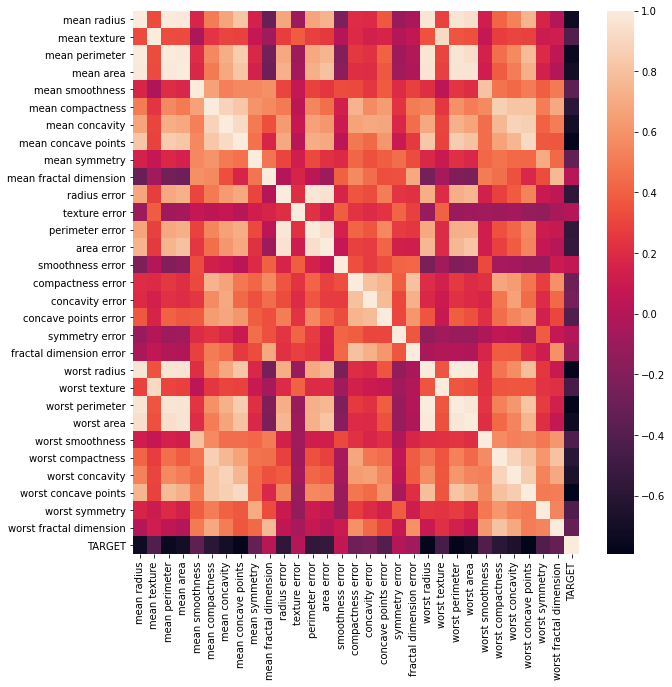

In [3]:
#heatmap to determine correlation between variables
plt.subplots(figsize=(10,10))
corr = df.corr()
hmap = sns.heatmap(corr)
# hmap.FontColor('white')

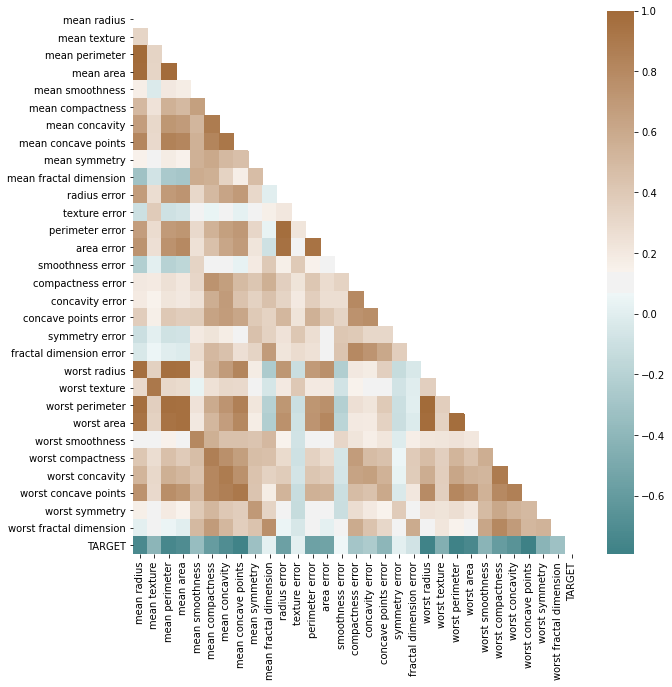

In [6]:
#2nd heatmap (multicolinearity)
plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(200, 40, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap)

In [7]:
#use standardScaler
df = df.drop(['TARGET'], axis=1)

standard_scaler = preprocessing.StandardScaler()
df_scaled = standard_scaler.fit_transform(df)

df_scale = pd.DataFrame(df_scaled)
df_scale.columns = LBC.feature_names
df_scale.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   worst concave points  worst symmetry  worst fractal dimension  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

In [8]:
svm_classifier = svm.SVC(kernel='linear', C=1.0)
print(svm_classifier)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [10]:
X = data
y = labels
standard_scaler = preprocessing.StandardScaler()
ss = standard_scaler.fit_transform(X)
# print(ss)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [12]:
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)